# plotting cloud statistics

I'm using the xarray plotting to plot where the clouds occur according to the ATL09 dataset

In [7]:
# initial imports

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from load_xarray_from_ATL09 import load_xarray_from_ATL09
from add_coordinates import add_coordinates

In [8]:
# load in the data

datafolder = '/home/users/eeasm/ICESAT_data/RGT0749_Cycles_10-12-bigger/processed_ATL09_20210211004659_07491001_005_01.h5'

ds = load_xarray_from_ATL09(datafolder)
ds = add_coordinates(ds)
ds

Frozen({'profile': 3, 'time_index': 6358, 'height': 700, 'layer': 10, 'surface type': 5})
aclr_true | (3, 6358): ['profile', 'time_index']
apparent_surf_reflec | (3, 6358): ['profile', 'time_index']
asr_cloud_probability | (3, 6358): ['profile', 'time_index']
backg_c | (3, 6358): ['profile', 'time_index']
backg_theoret | (3, 6358): ['profile', 'time_index']
beam_azimuth | (3, 6358): ['profile', 'time_index']
beam_elevation | (3, 6358): ['profile', 'time_index']
bsnow_con | (3, 6358): ['profile', 'time_index']
bsnow_dens | (3, 6358): ['profile', 'time_index']
bsnow_dens_flag | (3, 6358): ['profile', 'time_index']
bsnow_h | (3, 6358): ['profile', 'time_index']
bsnow_h_dens | (3, 6358): ['profile', 'time_index']
bsnow_intensity | (3, 6358): ['profile', 'time_index']
bsnow_od | (3, 6358): ['profile', 'time_index']
bsnow_psc | (3, 6358): ['profile', 'time_index']
cab_prof | (3, 6358, 700): ['profile', 'time_index', 'height']
cloud_flag_asr | (3, 6358): ['profile', 'time_index']
cloud_flag_a

<xarray.Dataset>
Dimensions:                (profile: 3, time_index: 6358, height: 700,
                            layer: 10, surface type: 5)
Coordinates:
  * profile                (profile) int64 1 2 3
  * time_index             (time_index) int64 0 1 2 3 4 ... 6354 6355 6356 6357
  * height                 (height) float32 2e+04 1.997e+04 ... -925.5 -955.5
  * layer                  (layer) int64 0 1 2 3 4 5 6 7 8 9
  * surface type           (surface type) int64 0 1 2 3 4
    d2s                    (profile, time_index) float64 899.4 899.1 ... 907.2
    height_AGL             (profile, time_index, height) float64 1.997e+04 .....
    time                   (profile, time_index) datetime64[ns] 2021-02-11T01...
Data variables: (12/73)
    aclr_true              (profile, time_index) float64 0.07434 0.07434 ... nan
    apparent_surf_reflec   (profile, time_index) float64 0.0 0.0 ... nan nan
    asr_cloud_probability  (profile, time_index) float64 100.0 100.0 ... nan nan
    backg_c                (profile, time_index) float64 0.06036 0.06036 ... nan
    backg_theoret          (profile, time_index) float64 0.0 0.0 0.0 ... nan nan
    beam_azimuth           (profile, time_index) float64 59.28 59.28 ... nan nan
    ...                     ...
    surface_h_dens         (profile, time_index) float64 3.403e+38 ... nan
    surface_height         (profile, time_index) float64 3.403e+38 ... nan
    surface_sig            (profile, time_index) float64 0.0 0.0 ... nan nan
    surface_thresh         (profile, time_index) float64 10.0 10.0 ... nan nan
    surface_width          (profile, time_index) float64 0.0 0.0 1.0 ... nan nan
    tx_pulse_energy        (profile, time_index) float64 9.361e-05 ... nan

In [15]:
reduce_vars = ['cab_prof', 'density_pass2','layer_bot','layer_top']

for p in reduce_vars:
    ds[p] = ds[p].where(ds[p] < 1e38).where(ds[p] > 0,0)

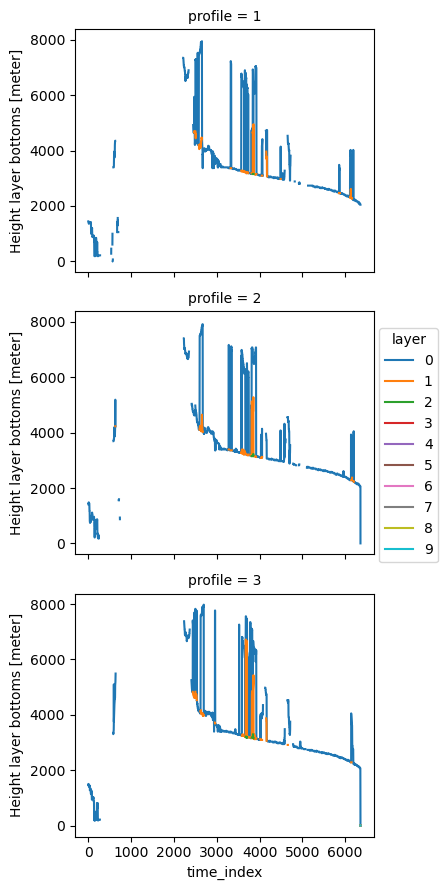

In [20]:
ds['layer_bot'].plot(x='time_index',col='profile',col_wrap=1,hue='layer')